# Caculate inequality for all datasets

In [1]:
import sys
sys.path.append('../py')
import ActivityTests
import CPD
import pickle

def cal_delta(seq,direction = False):
    act_delta = []
    for i in range(len(seq)-1):
        if direction is False:
            act_delta.append(seq[i]-seq[i+1])
        else:
            act_delta.append(abs(seq[i]-seq[i+1]))
    act_delta.append(0)
    return act_delta

cpd = CPD.CPD()
AT = ActivityTests.Activity()

StorResults = False
ver = "ver1"
graph_normalization = None

In [3]:
import ActivityTests
AT = ActivityTests.Activity()


Data = {1:{"Data":"Enron","nick":"CPD Norm", "DataDir":"Directed_by_CPD", "limits": [],
                 "Norm_File":"DaysToNormalize.pickle"},
        2:{"Data":"Enron","nick":"CPD UnNorm", "DataDir":"Directed_by_CPD","limits": [],"Norm_File":None},
        3:{"Data":"Enron","nick":"Weekly", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        4:{"Data":"Manufacturingemails","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None}, 
        5:{"Data":"UCIrvinemessages","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        6:{"Data":"DNC_emails","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        7:{"Data":"email-Eu-core-temporal","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        8:{"Data":"Facebook_wall_posts","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        9:{"Data":"Wikipedia_talk","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        10:{"Data":"Wikipedia_conflict","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},
        11:{"Data":"Hypertext_2009","nick":"", "DataDir":"Directed_hourly_manual","limits": [],"Norm_File":None},
        12:{"Data":"Haggle","nick":"", "DataDir":"Directed_hourly_manual","limits": [],"Norm_File":None},
        13:{"Data":"RealityMining","nick":"", "DataDir":"Directed_hourly_manual","limits": [],"Norm_File":None},       
       }

# I copied this dataset only to the git
Data = {7:{"Data":"email-Eu-core-temporal","nick":"", "DataDir":"Directed_weekly_manual","limits": [],"Norm_File":None},}

for data in Data:
    sss = AT.inequality_test(DataName=Data[data]["Data"],DataDir=Data[data]["DataDir"],nick=Data[data]["nick"],
                             years_limits=Data[data]["limits"],graph_normalization=Data[data]["Norm_File"],
                            drop_prev=False,DIR='FramewokExec/',SetID = data)
    print(data,Data[data]["Data"])
sss.head()

(7, 'email-Eu-core-temporal')


SetID                     data     subdir  \
0     7  email-Eu-core-temporal   ActiveMap   

                                                zeta zeta_norm  \
0  [2.07048376534, 1.96844342472, 2.18690774875, ...       NaN   

                                                  wX  \
0  [1970-01-08 00:00:00, 1970-01-15 00:00:00, 197...   

                                                 uwX  \
0  [1970-01-08 00:00:00, 1970-01-15 00:00:00, 197...   

                                                 wy3  \
0  [0.5864334803693189, 0.5713381743014747, 0.588...   

                                                uwy3  \
0  [0.5070574893970478, 0.5011200554198184, 0.504...   

                                                 wy2  ... EigenValueMean  \
0  [0.5006068756721853, 0.4927267564587446, 0.509...  ...              0   

                                      ClusteringCoef Clique4 Clique5 Clique7  \
0  [0.166341036179, 0.154902134443, 0.14436914642...       0       0       0   

                                           Closeness  \
0  [0.04409269655579769, 0.03404827061561902, 0.0...   

                                           EdgesSize  \
0  [1972, 1648, 1910, 1856, 1887, 1908, 2070, 186...   

                                           NodesSize  \
0  [581, 532, 567, 582, 566, 587, 609, 575, 612, ...   

                   proccessed zeta_noram  
0  2019-10-08 20:40:30.393486          0  

[1 rows x 27 columns]

# Data Analysis

In [4]:
import sys
sys.path.append('../py')
import ActivityTests
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

AT = ActivityTests.Activity()
ver = "ver3"
to_file = 'FramewokExec/MultiDataset/ActiveMap/'+ver+'/images/'
def load_df_gini_psi():
    with open ('FramewokExec/MultiDataset/ActiveMap/'+ver+'/Gini_Psi_results.pickle', 'rb') as fp:
        df_gini_psi = pickle.load(fp)
    df_gini_psi = df_gini_psi.astype('object')
    #print(df_gini_psi.dtypes)
    return df_gini_psi
df_gini_psi = load_df_gini_psi()
df_gini_psi.head()

SetID                     data     subdir  \
0     7  email-Eu-core-temporal   ActiveMap   

                                                zeta zeta_norm  \
0  [2.07048376534, 1.96844342472, 2.18690774875, ...       NaN   

                                                  wX  \
0  [1970-01-08 00:00:00, 1970-01-15 00:00:00, 197...   

                                                 uwX  \
0  [1970-01-08 00:00:00, 1970-01-15 00:00:00, 197...   

                                                 wy3  \
0  [0.5864334803693189, 0.5713381743014747, 0.588...   

                                                uwy3  \
0  [0.5070574893970478, 0.5011200554198184, 0.504...   

                                                 wy2  ... EigenValueMean  \
0  [0.5006068756721853, 0.4927267564587446, 0.509...  ...              0   

                                      ClusteringCoef Clique4 Clique5 Clique7  \
0  [0.166341036179, 0.154902134443, 0.14436914642...       0       0       0   

                                           Closeness  \
0  [0.04409269655579769, 0.03404827061561902, 0.0...   

                                           EdgesSize  \
0  [1972, 1648, 1910, 1856, 1887, 1908, 2070, 186...   

                                           NodesSize  \
0  [581, 532, 567, 582, 566, 587, 609, 575, 612, ...   

                   proccessed zeta_noram  
0  2019-10-08 20:40:30.393486          0  

[1 rows x 27 columns]

In [5]:
groups = {'test':[7], 'emails':[3,4,6,7],'forums':[8,9,10,11],'ef2f':[12,13,14],
          'infra':[15,16],'synthetic':[100,101,102,103,104,105,106],
         'all':[11,9,10,7,8,4],
          'Enron':[3],'Manufacturingemails':[4],'email-Eu-core-temporal':[7],
         'UCIrvinemessages':[5], 'Wikipedia_talk': [9],'Wikipedia_conflict':[10],'DNC_emails':[6],
         'Facebook_wall_posts':[8],'AskUbuntu Weekly':[11],'Haggle':[13],'Hypertext_2009':[12],
         'EnronFull':[17]}

dsp = {'email-Eu-core-temporal':[1,2],'Facebook_wall_posts':[100,0],'Wikipedia_talk':[250,0],
      'Wikipedia_conflict':[200,10],'AskUbuntu Weekly':[105,0],
      'EnronFull':[50,5],'Enron':[44,15]}

colors = ['blue','olive', 'cyan' , 'orange' , 'green', 'brown'  ,'magenta',
          'black', 'gold','lightcoral','teal','salmon' ,'wheat','lavender','darkgreen','darkgray','darkred',
         'skyblue']

## Matplotlib

### The DATA

In [6]:
df_gini_psi

SetID                     data     subdir  \
0     7  email-Eu-core-temporal   ActiveMap   

                                                zeta zeta_norm  \
0  [2.07048376534, 1.96844342472, 2.18690774875, ...       NaN   

                                                  wX  \
0  [1970-01-08 00:00:00, 1970-01-15 00:00:00, 197...   

                                                 uwX  \
0  [1970-01-08 00:00:00, 1970-01-15 00:00:00, 197...   

                                                 wy3  \
0  [0.5864334803693189, 0.5713381743014747, 0.588...   

                                                uwy3  \
0  [0.5070574893970478, 0.5011200554198184, 0.504...   

                                                 wy2  ... EigenValueMean  \
0  [0.5006068756721853, 0.4927267564587446, 0.509...  ...              0   

                                      ClusteringCoef Clique4 Clique5 Clique7  \
0  [0.166341036179, 0.154902134443, 0.14436914642...       0       0       0   

                                           Closeness  \
0  [0.04409269655579769, 0.03404827061561902, 0.0...   

                                           EdgesSize  \
0  [1972, 1648, 1910, 1856, 1887, 1908, 2070, 186...   

                                           NodesSize  \
0  [581, 532, 567, 582, 566, 587, 609, 575, 612, ...   

                   proccessed zeta_noram  
0  2019-10-08 20:40:30.393486          0  

[1 rows x 27 columns]

In [7]:
data_desk = {}
for net in groups['all']:
    dd = df_gini_psi[df_gini_psi['SetID']==net]
    data_desk[dd['data'].iloc[0]] = {
        'Duration' : len(AT.net_clean(dd['X1'].iloc[0],net)),
        'max_nodes': max(AT.net_clean(dd['NodesSize'].iloc[0],net)),
        'min_nodes': min(AT.net_clean(dd['NodesSize'].iloc[0],net)),
        'max_edges': max(AT.net_clean(dd['EdgesSize'].iloc[0],net)),
        'min_edges': min(AT.net_clean(dd['EdgesSize'].iloc[0],net))}
pd.DataFrame.from_dict(data_desk, orient='index')

Duration  max_nodes  min_edges  min_nodes  max_edges
AskUbuntu Weekly              198       2832       2108       1458       4325
Enron Weekly                   78        107         27         33        212
Facebook_wall_posts           124      11325       1514       1566      13384
Manufacturingemails            38        148        587        104       1335
Wikipedia_conflict            156       7250       3749       2011      33623
Wikipedia_talk                132      53236      26494      15154      73356
email-Eu-core-temporal         74        667         46         52       3197

### Scatter / Hitogram

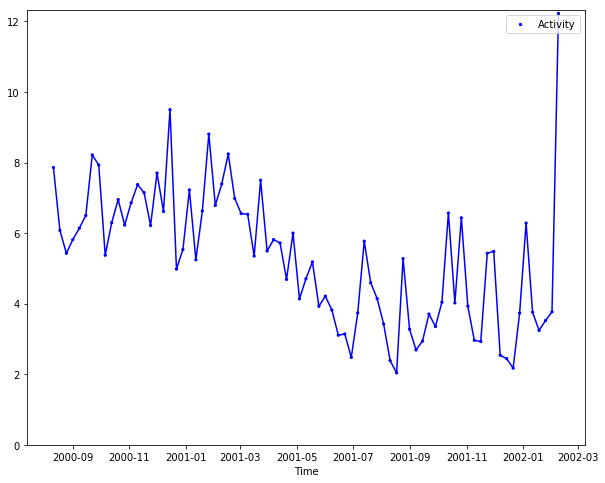

In [19]:
import matplotlib.pyplot as plt 
import numpy as np
import datetime

# ******************************
# PARAMETERS
# ******************************

metrix = [('uwy3','Gini',[0,1.1]),    ('zeta',"Activity"),                ('EigenValueMean','EigenMean')
         ,('Closeness','Closeness'),  ('ClusteringCoef','ClusteringCoef'),('Clique4','Clique4')
         ,('NodesSize','NodesSize'),  ('EdgesSize','EdgesSize')]

metrics = [metrix[1]]
#'email-Eu-core-temporal','Facebook_wall_posts','Wikipedia_talk','Wikipedia_conflict','AskUbuntu Weekly','Manufacturingemails'
group_name = 'Enron'

plot_delta = False
percent = True
direction = True
hor_line = -1

# ******************************
# Use the CPD file and comparison file only when projecting one data set to compare it to CPD
GraphCpomparision_file = None# None = not to show, group_name
#GraphCpomparision_file = None
plot_cpd_points=0  # 0- not to plot , 1- just CPD , 2 - all windows
cpd_p_value = 0.90
#hor_line = cpd_p_value
# ******************************

graph_normalization = None #
drawtype = 'scatter' #'hist' , 'scatter'
bins = 30
histtype = 'step' #'bar', 'barstacked', 'step', 'stepfilled'
cumulative = False

show_data_ids = groups[group_name]
#show_data_ids = groups['forums']
#show_data_ids = [17]


# ******************************
# PARAMETERS END
# ******************************

save_file = to_file +group_name
for metric_y in metrics:
    save_file += "_"+metric_y[1]
if plot_delta:
    save_file += "_Delta"
if percent:
    save_file += "_Percent"
if drawtype == 'hist':
    if cumulative:
        save_file += "CDF"
    else:
        save_file += "PDF"
else:
    save_file += "_overtime"
#save_file = None
if group_name in dsp:
    param = dsp[group_name]
else:
    param = [1,0]
AT.draw_feature_time(df_gini_psi,show_data_ids,metrics,plot_delta,direction,hor_line,GraphCpomparision_file,
                     cpd_p_value,plot_cpd_points,percent=percent,
                     draw_type=drawtype,bins=bins, cdf=True, histtype = histtype,cumulative = cumulative,pin_size = 5,
                     ltrim = param[0],rtrim = param[1], lgd='upper right',
                     print_stats = True,to_file = save_file, debug=False, max_y=0
                    )

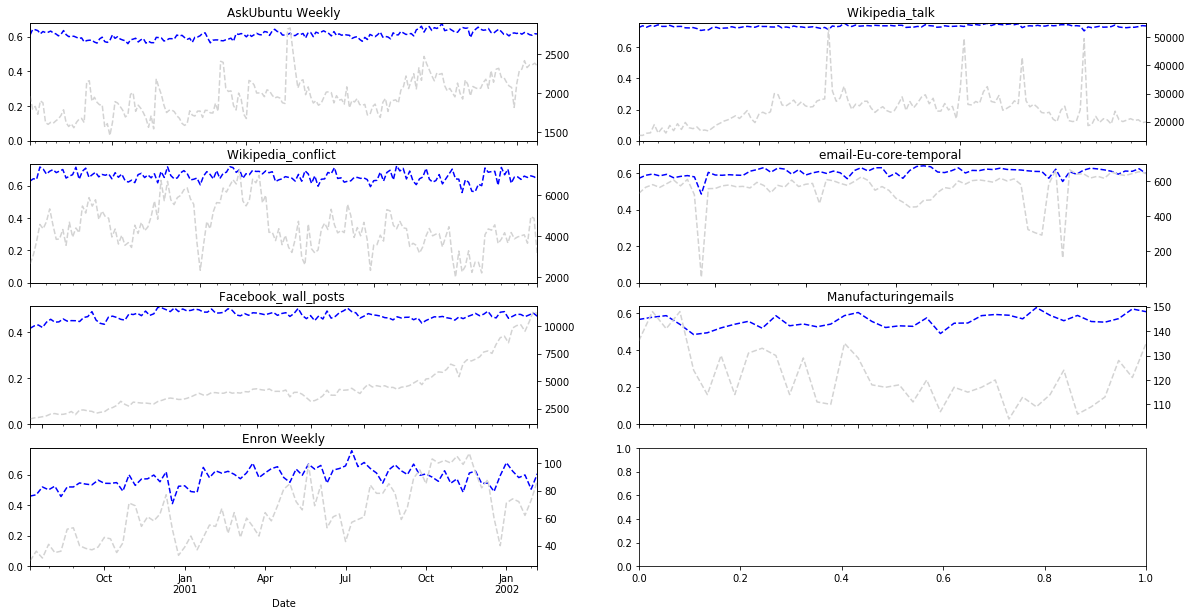

In [99]:
PlotRows,PlotCols = 4,2
fig, axes = plt.subplots(nrows=PlotRows, ncols=PlotCols,figsize=[20,10])
row_index = 0
for row in groups['all']:
    dn , activity = AT.net_feature(df_gini_psi,row,'zeta',changes=False,direction=False,percent=False)
    dn , gini = AT.net_feature(df_gini_psi,row,'wy3',changes=False,direction=False,percent=False)
    dn , netsize = AT.net_feature(df_gini_psi,row,'NodesSize',changes=False,direction=False,percent=False)
    dn , date = AT.net_feature(df_gini_psi,row,'X1',changes=False,direction=False,percent=False)
    df = pd.DataFrame({"Date": date,
                       "Activity": activity, 
                       "Gini" : gini,
                       "NetSize": netsize})
    celly = row_index//2
    cellx = row_index%2
    ax = df.plot(ax=axes[celly,cellx], x="Date", y="Gini", color='b',legend=False, linestyle='--')
    
    #ax.set_ylim(0.0,1.1) # When Gini is ploted
    ax.set_ylim(0.0) # When Activity is ploted
    
    ax.set_title(dn)
    ax2 = ax.twinx()
    df.plot(x="Date", y="NetSize", ax=ax2, legend=False, color="lightgray", linestyle='--')
    row_index += 1
#ax.figure.legend()
plt.show()
fig.savefig(to_file+ 'all_pannel_gini_netzise_overtime', dpi=300)


### 2D plotting

[2, 5, 6, 7, 8, 9, 23]
[2, 5, 6, 7, 8, 9, 23]


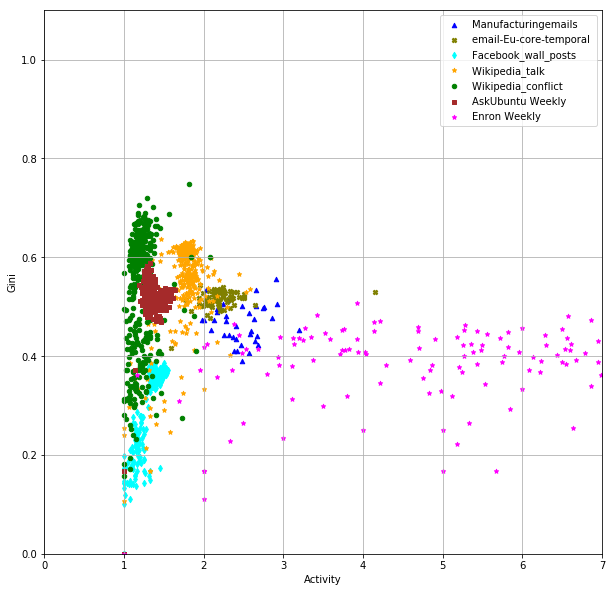

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

group_name = 'all'
selected_group = groups[group_name] # emails,forums, ef2f, synthetic, infra
#selected_group += [100,101,102,103,104,105,106]
rows_to_plot = list(set([df_gini_psi[df_gini_psi['SetID']==x].index[0] for x in selected_group]))
print(rows_to_plot)
#rows_to_plot.append(23)
#rows_to_plot.append(2)

StorResults = True
plot_delta = False
x_lim = 7 # 0= auto
metrix = [('uwy3','Gini',[0,1.1]),    ('zeta',"Activity"),                ('EigenValueMean','EigenMean')
         ,('Closeness','Closeness'),  ('ClusteringCoef','ClusteringCoef'),('Clique4','Clique4')
         ,('NodesSize','NodesSize'),  ('EdgesSize','EdgesSize')]
metric_y = metrix[0]
metric_x = metrix[1]
unweighted_plots = []
indegree_plots = ['Synthetic PA3.5-3.5']




df_gini_psi = load_df_gini_psi()

colors = ['blue','olive', 'cyan' , 'orange' , 'green', 'brown'  ,'magenta',
          'black', 'gold','lightcoral','teal','salmon' ,'wheat','lavender','darkgreen','darkred',
         'skyblue']
markers = ['o', 's', '^','d','p','X','d','*']
horizontal_lines = [0.06,0.95]
f, ax = plt.subplots(1,figsize=(10,10))

color_index = 0
number_mark = 1
print(rows_to_plot)
for i in rows_to_plot:
    xm = df_gini_psi[metric_x[0]].iloc[i]
    if plot_delta:
        xm = AT.cal_delta(xm)
        
    
    if df_gini_psi['data'].iloc[i] in indegree_plots:
        y_axes = df_gini_psi['wy2'].iloc[i]
    else:
        y_axes = df_gini_psi[metric_y[0]].iloc[i]
    ym = [float(x) for x in y_axes]
    if plot_delta:
            ym = AT.cal_delta(ym)
    
    label = df_gini_psi['data'].iloc[i] 
    
    if df_gini_psi['data'].iloc[i][:9] == 'Synthetic':
        marker_size = 5
        cur_color = 'lightgray'
        ax.scatter(xm, ym, s= marker_size, color = cur_color,
                   marker=markers[i%len(markers)])
    else:
        marker_size = 20
        cur_color = colors[color_index%len(colors)]
        ax.scatter(xm, ym, s= marker_size, color = cur_color,
                   marker=markers[i%len(markers)],label=label)
    color_index += 1
#for i in horizontal_lines:
#    ax.plot(range(x_lim+1), [i]*(x_lim+1) , linestyle='--', color='black')
if len(metric_y)>2:
    ax.set_ylim(ymin=metric_y[2][0],ymax=metric_y[2][1])
if x_lim == 0:
    ax.set_xlim(0,max(xm)+1)
else:
    ax.set_xlim(0,x_lim)
plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel(metric_y[1])
plt.xlabel(metric_x[1])
plt.show()
if StorResults:
    save_file = to_file + 'Dataset_Comparison_' + group_name+'.png'
    f.savefig(save_file, dpi=300)

### Clustering

In [4]:
def get_xy(df_gini_psi,rows,norm = '',feature1='zeta',feature2='wy3'):
    X = None
    for row in rows:
        x = np.array(df_gini_psi['zeta'].iloc[row])
        y = df_gini_psi['wy3'].iloc[row]
        if norm == 'zscore':
            x = stats.zscore(x)
            y = stats.zscore(y)
        if norm == 'delta':
            x= AT.cal_delta(x,changes=Ture,percent=True)
            y= AT.cal_delta(y,changes=Ture,percent=True)
        if X is not None:
            X = np.concatenate(( X,np.array([[x,y] for x,y in zip( x , y)])))
        else:
            X = np.array([[x,y] for x,y in zip( x , y)])
    return X


#### Hierarchical Clustering

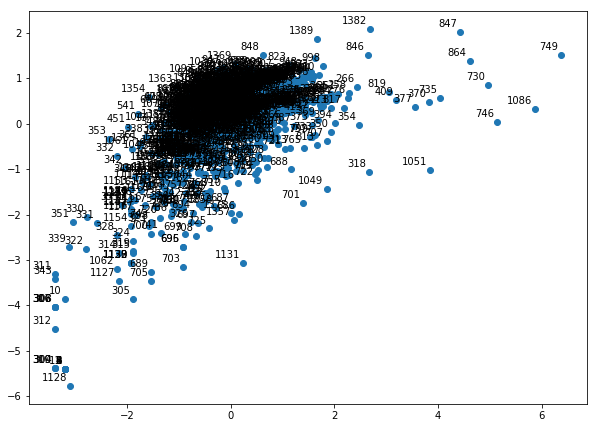

In [206]:
from scipy import stats

group_name = 'all'
selected_group = groups[group_name] # emails,forums, ef2f, synthetic, infra
rows_to_plot = [df_gini_psi[df_gini_psi['SetID']==x].index[0] for x in selected_group]
#rows_to_plot = [7]

X = get_xy(df_gini_psi,rows_to_plot,norm='zscore')
labels = range(1, len(X))  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

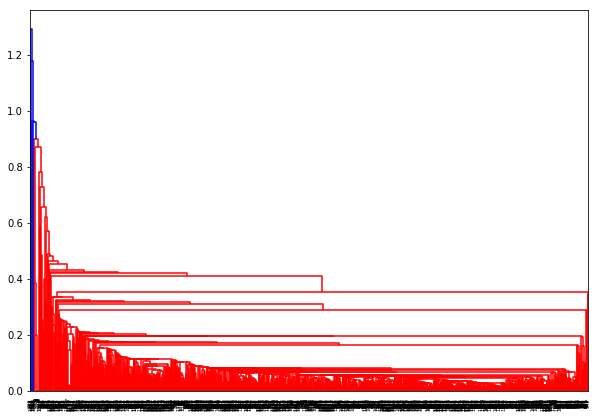

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, len(X)+1)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

In [208]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  


array([1, 1, 1, ..., 0, 2, 2])

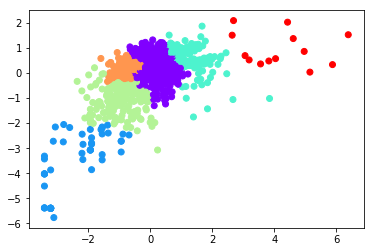

In [209]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')  

#### K-Means

In [29]:
from matplotlib import style
from sklearn.cluster import KMeans

In [34]:
group_name = 'all'
selected_group = groups[group_name] # emails,forums, ef2f, synthetic, infra
rows_to_plot = [df_gini_psi[df_gini_psi['SetID']==x].index[0] for x in selected_group]

X = get_xy(df_gini_psi,rows_to_plot)

In [35]:
clf = KMeans(n_clusters=len(selected_group))
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
centroids = clf.cluster_centers_
labels = clf.labels_

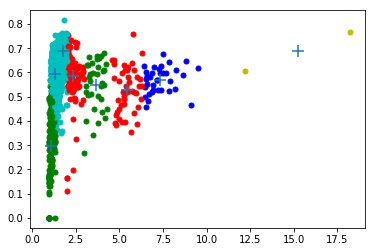

In [40]:
colors = ["g.","r.","c.","y.","b.","g.","r.","c."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "+", s=150, linewidths = 5, zorder = 10)
plt.show()

### Classification

In [22]:
def prepare_data(df_gini_psi,rows,norm = '',features= ['zeta','wy3']):
    X = None
    Y = []
    classes = {}
    class_id = 0
    for row in rows:
        x = np.array(df_gini_psi['zeta'].iloc[row])
        y = df_gini_psi['wy3'].iloc[row]
        Y += Y + [class_id] * len(x) 
        classes[row] = class_id
        class_id += 1
        if norm == 'zscore':
            x = stats.zscore(x)
            y = stats.zscore(y)
        if norm == 'delta':
            x= AT.cal_delta(x,changes=Ture,percent=True)
            y= AT.cal_delta(y,changes=Ture,percent=True)
        if X is not None:
            X = np.concatenate(( X,np.array([[x,y] for x,y in zip( x , y)])))
        else:
            X = np.array([[x,y] for x,y in zip( x , y)])
        
    return X , np.array(Y) , classes

In [23]:
group_name = 'all'
selected_group = groups[group_name] # emails,forums, ef2f, synthetic, infra
rows_to_plot = [df_gini_psi[df_gini_psi['SetID']==x].index[0] for x in selected_group]
X, y , class_dic = prepare_data(df_gini_psi,rows_to_plot)

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import time

seeds =[2,4,6,10,15,20,25]
num_of_folds = [10,20,30,40,50,70,90,110]    

skf = StratifiedKFold(n_splits=num_of_folds[0],random_state=seeds[2],shuffle=True) 

clf = KNeighborsClassifier(n_neighbors=k,leaf_size=l,algorithm=n,p=m)
scores = cross_val_score(clf, X, y, cv=skf, scoring=scoring)

### 3d Plotting

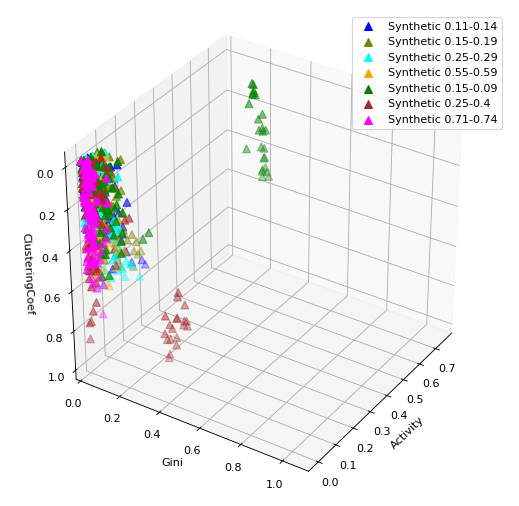

In [25]:
%matplotlib inline 
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import interactive
interactive(True)

group_name = 'synthetic'
plot_delta = True
percent = True
delta_direction = True
StorResults = False


colors = ['blue','olive', 'cyan' , 'orange' , 'green', 'brown'  ,'magenta',
          'black', 'gold','lightcoral','teal','salmon' ,'wheat','lavender','darkgreen','darkgray','darkred',
         'skyblue']
fig = plt.figure(dpi=80, figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
color_index = 0
selected_group = groups[group_name]
eee = [3,4,5,6,7,8,9,10,11]
for ds in groups[group_name]:
    #print(ds)
    display_row = df_gini_psi[df_gini_psi['SetID']==ds].index[0]
    label = df_gini_psi['data'].iloc[display_row]
    y = np.array(df_gini_psi['wy3'].iloc[display_row])
    x = np.array(df_gini_psi['zeta'].iloc[display_row])
    z= np.array(df_gini_psi['ClusteringCoef'].iloc[display_row])
    if plot_delta:
        x = AT.cal_delta(seq=x,percent=percent, direction=delta_direction)
        y = AT.cal_delta(seq=y,percent=percent, direction=delta_direction)
        z = AT.cal_delta(seq=z,percent=percent, direction=delta_direction)
    ax.scatter(x, y, z,s=50 ,color=colors[color_index%len(colors)], marker="^", label =label)
    color_index += 1


ax.set_xlabel('Activity')
ax.set_ylabel('Gini')
ax.set_zlabel('ClusteringCoef')

ax.view_init(azim=-33,elev=-146) # For Emails
plt.legend(loc='upper right')
ax.set_ylim(ymin=0,ymax=1.1)
#ax.set_xlim(0,max(pzeta)+1)
#ax.set_xlim(0,20)
if StorResults:
    save_file = to_file + 'Dataset_Comparison_3D_' + group_name+'.png'
    fig.savefig(save_file, dpi=300)
#plt.show()

## Seaborn

In [12]:
feature = 'zeta' # 'zeta' , 'wy3'
changes = False
direction = False
percent = False

nets = {}
netsid = {}
for net in groups['all']:
    dname,feature_data = AT.net_feature(df_gini_psi,
                                        net,feature,changes,direction,percent)
    nets[dname] = feature_data
    netsid[net] = dname


### plot/scatter test

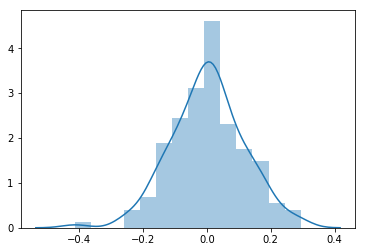

In [15]:
#hist EnronFull
ename,efeature_data = AT.net_feature(df_gini_psi,17,feature,changes,direction,percent)
q = sns.distplot(efeature_data);

#q = sns.distplot(nets[netsid[17]]);

#fig = q.get_figure()
#fig.savefig(to_file + "sns_mailEU_activity_PDF.png")

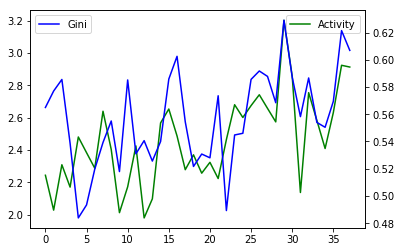

In [231]:
df = pd.DataFrame({"date": df_gini_psi['X1'][3],
                   "Activity": df_gini_psi['zeta'][3], 
                   "Gini": df_gini_psi['wy3'][3]})
sns.lineplot(data=df.Activity, color="g",label ='Activity')
ax2 = plt.twinx()
sns.lineplot(data=df.Gini, color="b", label = 'Gini',ax=ax2)

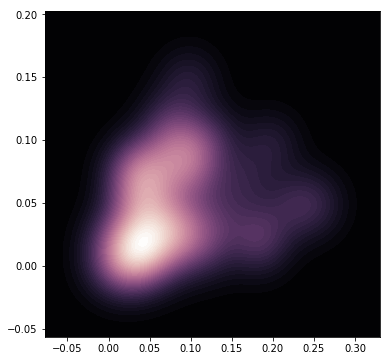

In [232]:
t,tx = AT.net_feature(df_gini_psi,4,'zeta',changes,direction,percent)
t, ty = AT.net_feature(df_gini_psi,4,'wy3',changes,direction,percent)
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(tx, ty, cmap=cmap, n_levels=60, shade=True);

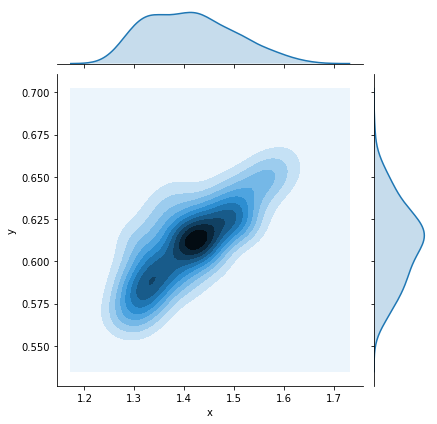

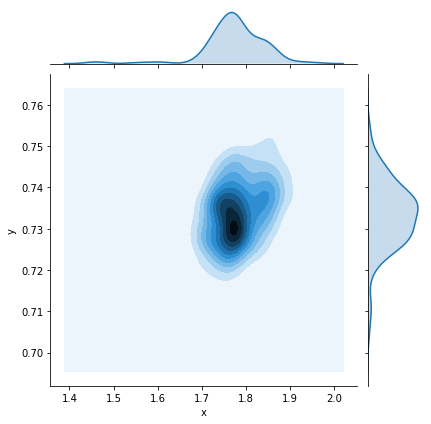

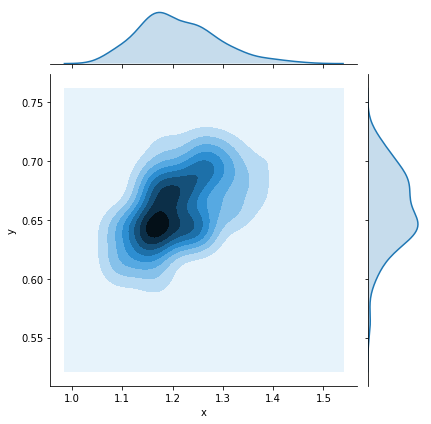

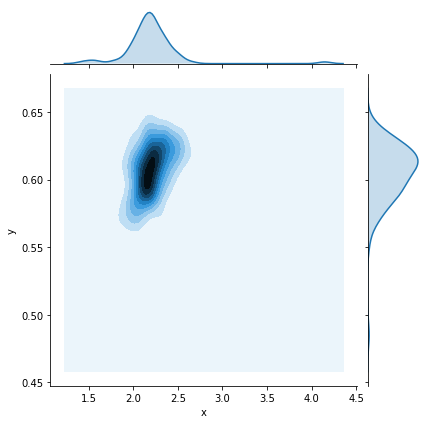

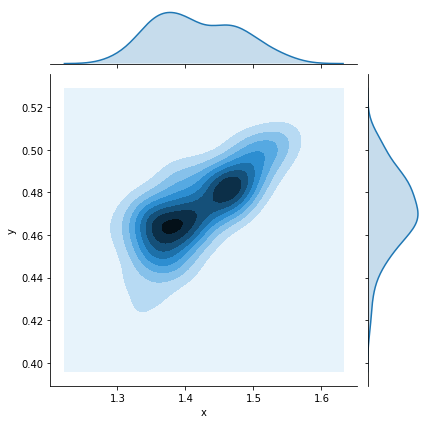

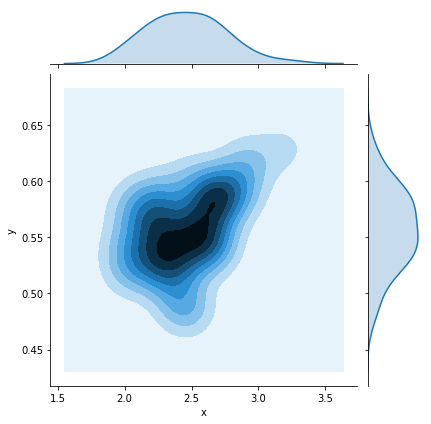

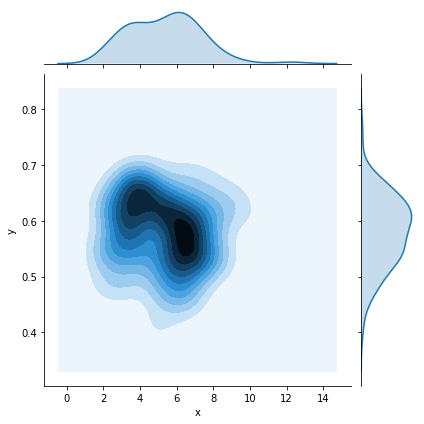

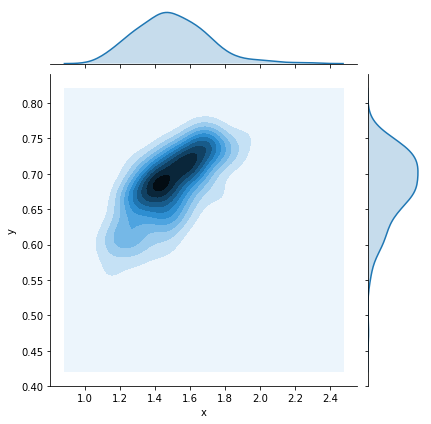

In [10]:
net = 4
feature1 = 'zeta'
feature2 = 'wy3'

for net in groups['all']:
    t,tx = AT.net_feature(df_gini_psi,net,feature1,changes,direction,percent)
    t, ty = AT.net_feature(df_gini_psi,net,feature2,changes,direction,percent)
    temp_xy = pd.DataFrame(np.column_stack([tx, ty]), 
                                   columns=['x', 'y'])
    sns.jointplot(x="x", y="y", data=temp_xy, kind="kde");

### Histograms

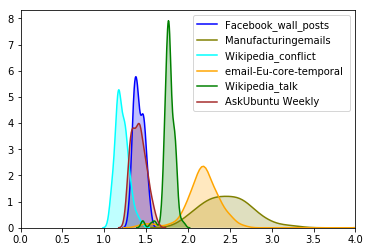

In [15]:
cumulative = False
shade = True
color_index = 0
for net in nets:
    p1=sns.kdeplot(nets[net], shade=shade, color = colors[color_index%len(colors)], 
                   label = net, cumulative=cumulative)
    p1.set_xlim(0.0,4.0)
    color_index += 1

    #p1 = sns.lineplot(data=np.array([0.95]*10), color="black", linestyle='--')
#p1.lines[7].set_linestyle("--")
#plt.plot([0.065, 0.065], [0,0.95], color="black",linestyle='--')
#plt.plot([0.12, 0.12], [0,0.95], color="black",linestyle='--')

#sns.axhline(10, ls='--')
#p1.legend(loc='lower right')
fig = p1.get_figure()
fig.savefig(to_file + "Temporal Network Intensity PDF .png", dpi=300)

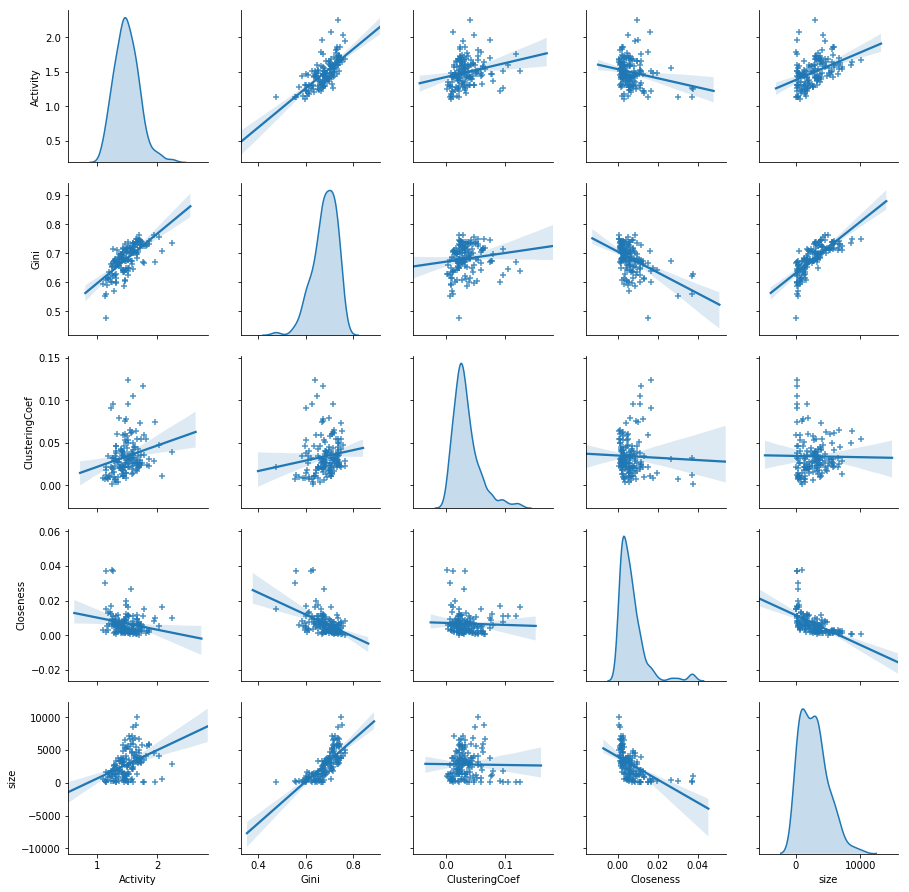

In [9]:
changes = False
direction = False
percent = True
net = 17

d1,x1 = AT.net_feature(df_gini_psi,net,'zeta',changes,direction,percent)
d2,x2 = AT.net_feature(df_gini_psi,net,'wy3',changes,direction,percent)
d3,x3 = AT.net_feature(df_gini_psi,net,'ClusteringCoef',changes,direction,percent)
d4,x4 = AT.net_feature(df_gini_psi,net,'Closeness',changes,direction,percent)
d5,x5 = AT.net_feature(df_gini_psi,net,'NodesSize',changes,direction,percent)
df_xy = pd.DataFrame(np.column_stack([x1, x2,x3,x4,x5]), 
                               columns=['Activity', 'Gini','ClusteringCoef','Closeness','size'])
pp = sns.pairplot(df_xy, diag_kind="kde", kind = 'reg',markers="+")
#g = sns.PairGrid(df_xy)
#g.map_upper(plt.scatter)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False);

#pp.savefig(to_file + "sns_"+d1+"_pairplot.png")